In [ ]:
| Feature              | **Apriori Algorithm**                                           | **Association Rules**                                           |
| -------------------- | --------------------------------------------------------------- | --------------------------------------------------------------- |
| **Purpose**          | To **find frequent itemsets** (items that often occur together) | To **find relationships** between those frequent itemsets       |
| **Stage in Process** | **Step 1** – Mining frequent itemsets                           | **Step 2** – Generating rules from those itemsets               |
| **Output Example**   | `{milk, bread}` appears in 60% of transactions                  | `milk → bread` (If milk is bought, bread is also likely bought) |
| **Uses**             | Identifies combinations of items                                | Identifies cause–effect or dependency patterns                  |
| **Key Metric**       | **Support** (how often items appear together)                   | **Support, Confidence, Lift** (to evaluate rule strength)       |
| **Input Data**       | Transaction dataset (e.g., baskets)                             | Frequent itemsets generated by Apriori                          |
| **Algorithm Type**   | Data mining algorithm                                           | Rule extraction method                                          |
| **Example Code**     | `apriori(basket, min_support=0.01)`                             | `association_rules(frequent_itemsets, metric='lift')`           |


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [29]:
df = pd.read_csv("Groceries_dataset.csv")

In [30]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [32]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [33]:
basket = (
    df.groupby(['Member_number', 'itemDescription'])['itemDescription']
    .count()
    .unstack()
    .fillna(0)
)

basket[basket > 0] = 1

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Step 2: Generate rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Step 3: Sort and display strongest associations
print(rules.sort_values('lift', ascending=False).head())


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                        antecedents                     consequents  \
197                 (bottled water)  (whole milk, other vegetables)   
192  (whole milk, other vegetables)                 (bottled water)   
196              (other vegetables)     (whole milk, bottled water)   
193     (whole milk, bottled water)              (other vegetables)   
239                        (yogurt)  (whole milk, other vegetables)   

     antecedent support  consequent support   support  confidence      lift  \
197            0.213699            0.191380  0.056183    0.262905  1.373732   
192            0.191380            0.213699  0.056183    0.293566  1.373732   
196            0.376603            0.112365  0.056183    0.149183  1.327657   
193            0.112365            0.376603  0.056183    0.500000  1.327657   
239            0.282966            0.191380  0.071832    0.253853  1.326434   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
197               1.0  0.0

In [37]:
# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(basket)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
basket['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = basket.groupby('Cluster').mean()
print(cluster_summary)


itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Cluster                                                              
0                             0.012155  0.046751          0.001403   
1                             0.000000  0.066667          0.000000   
2                             0.000000  0.095238          0.047619   
3                             0.023654  0.135400          0.012235   
4                             0.010060  0.074447          0.006036   

itemDescription  artif. sweetener  baby cosmetics      bags  baking powder  \
Cluster                                                                      
0                        0.004208        0.000468  0.000468       0.015895   
1                        0.000000        0.000000  0.000000       0.066667   
2                        0.000000        0.000000  0.000000       0.000000   
3                        0.009788        0.000816  0.001631       0.057096   
4                        0.016097        

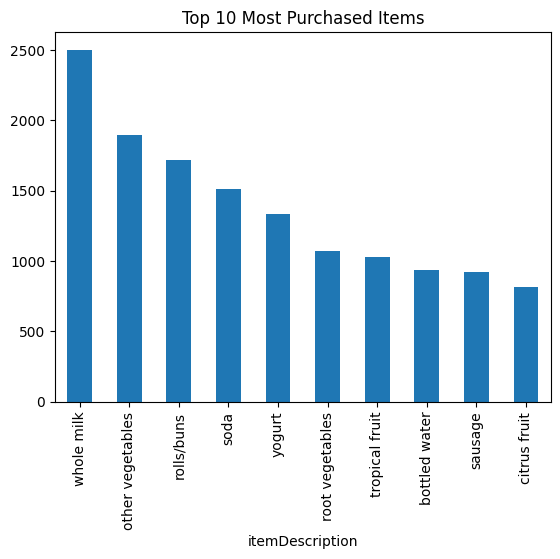

In [38]:
import matplotlib.pyplot as plt

item_counts = df['itemDescription'].value_counts().head(10)
item_counts.plot(kind='bar')
plt.title('Top 10 Most Purchased Items')
plt.show()